In [4]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor

from sklearn.svm import SVR

from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import KFold,GridSearchCV,cross_val_score

import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

#Chennai house price pridicting use ML

###import Data

In [57]:
#!pip install ydata-profiling
df=pd.read_csv('/content/Chennai houseing sale.csv')
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [58]:
df.shape

(7109, 22)

In [59]:
df.nunique()

PRT_ID           7109
AREA               17
INT_SQFT         1699
DATE_SALE        2798
DIST_MAINROAD     201
N_BEDROOM           4
N_BATHROOM          2
N_ROOM              5
SALE_COND           9
PARK_FACIL          3
DATE_BUILD       5808
BUILDTYPE           5
UTILITY_AVAIL       5
STREET              5
MZZONE              6
QS_ROOMS           31
QS_BATHROOM        31
QS_BEDROOM         31
QS_OVERALL        479
REG_FEE          7038
COMMIS           7011
SALES_PRICE      7057
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [61]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


###Pandas profiling

In [62]:
#from ydata_profiling import ProfileReport

In [63]:
#profile=ProfileReport(df)
#profile.to_file(output_file='df.html')

###Feature Engineering

In [64]:
df.isnull().sum()/len(df)*100    #missing value in percentage

PRT_ID           0.000000
AREA             0.000000
INT_SQFT         0.000000
DATE_SALE        0.000000
DIST_MAINROAD    0.000000
N_BEDROOM        0.014067
N_BATHROOM       0.070333
N_ROOM           0.000000
SALE_COND        0.000000
PARK_FACIL       0.000000
DATE_BUILD       0.000000
BUILDTYPE        0.000000
UTILITY_AVAIL    0.000000
STREET           0.000000
MZZONE           0.000000
QS_ROOMS         0.000000
QS_BATHROOM      0.000000
QS_BEDROOM       0.000000
QS_OVERALL       0.675200
REG_FEE          0.000000
COMMIS           0.000000
SALES_PRICE      0.000000
dtype: float64

In [65]:
df.dropna(axis=0,inplace=True)

In [66]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [67]:
x=df.drop(['PRT_ID','SALES_PRICE'],axis=1)

In [68]:
y=df['SALES_PRICE']

In [69]:
x.select_dtypes(include='object').columns

Index(['AREA', 'DATE_SALE', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE'],
      dtype='object')

In [70]:
x['DATE_SALE']=pd.to_datetime(x['DATE_SALE'])
x['DATE_SALE'].dtype

dtype('<M8[ns]')

In [71]:
x['DATE_SALE']=pd.to_numeric(x['DATE_SALE'])
x['DATE_SALE'].dtypes

dtype('int64')

In [72]:
x['DATE_BUILD']=pd.to_datetime(x['DATE_BUILD']) #,format='%y/%m/%d'
x['DATE_BUILD']=pd.to_numeric(x['DATE_BUILD'])
x['DATE_BUILD'].dtype

dtype('int64')

In [73]:
x.select_dtypes(include='object').nunique()

AREA             17
SALE_COND         9
PARK_FACIL        3
BUILDTYPE         5
UTILITY_AVAIL     5
STREET            5
MZZONE            6
dtype: int64

In [74]:
l=x.select_dtypes(include='object').columns

In [75]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in l:
    x[i]=le.fit_transform(x[i])


In [76]:
x.select_dtypes(include='object').columns

Index([], dtype='object')

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [78]:
scal=StandardScaler()
x_train=scal.fit_transform(x_train)
x_test=scal.transform(x_test)

In [79]:
x_train.shape

(4939, 20)

In [80]:
x.shape

(7056, 20)

In [81]:
x_test.shape

(2117, 20)

###Create Model

In [82]:
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import numpy
def evaluate(act,pred):
  r2=r2_score(act,pred)
  mae = mean_absolute_error(act, pred)
  mse = mean_squared_error(act, pred)
  #print(r2)
  return "R2 score is :", r2, "root absolute error is:", mae, "Mean root squared error:", numpy.sqrt(mse)

LinearRegression
LinearRegression Traning score is : 0.8701
LinearRegression Testing score is : 0.8671


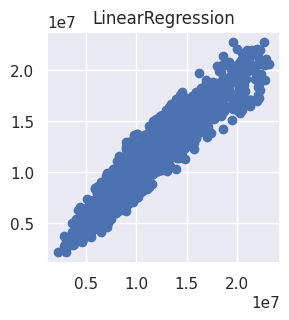

('R2 score is :', 0.8671315266081188, 'root absolute error is:', 1096320.271930977, 'Mean root squared error:', 1378826.5119009817)
    
_ _ _ _ _
    
RidgeCV
RidgeCV Traning score is : 0.8701
RidgeCV Testing score is : 0.8671


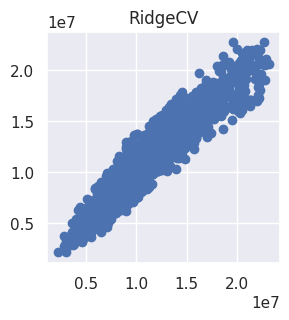

('R2 score is :', 0.8671251387263293, 'root absolute error is:', 1096303.7050637677, 'Mean root squared error:', 1378859.6562379391)
    
_ _ _ _ _
    
LassoCV
LassoCV Traning score is : 0.8699
LassoCV Testing score is : 0.8670


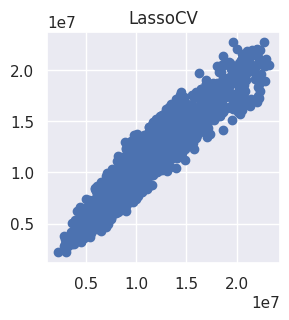

('R2 score is :', 0.8669887281948592, 'root absolute error is:', 1094810.5880838102, 'Mean root squared error:', 1379567.2495611503)
    
_ _ _ _ _
    
RandomForestRegressor
RandomForestRegressor Traning score is : 0.9956
RandomForestRegressor Testing score is : 0.9681


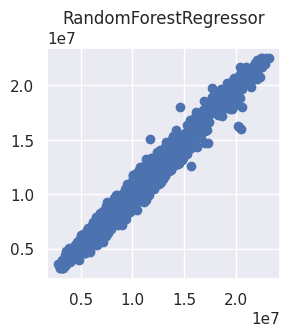

('R2 score is :', 0.9680706433321791, 'root absolute error is:', 526084.6635805386, 'Mean root squared error:', 675917.5717551402)
    
_ _ _ _ _
    
AdaBoostRegressor
AdaBoostRegressor Traning score is : 0.8897
AdaBoostRegressor Testing score is : 0.8858


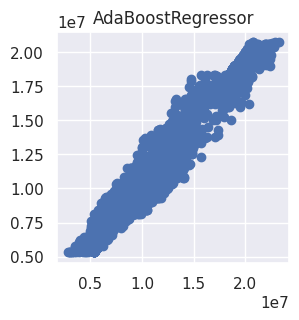

('R2 score is :', 0.8857803138555553, 'root absolute error is:', 1031557.746861093, 'Mean root squared error:', 1278406.982475905)
    
_ _ _ _ _
    
DecisionTreeRegressor
DecisionTreeRegressor Traning score is : 1.0000
DecisionTreeRegressor Testing score is : 0.9377


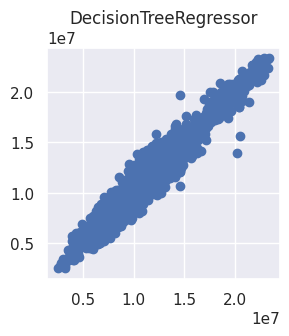

('R2 score is :', 0.9377256967508238, 'root absolute error is:', 717928.9064714218, 'Mean root squared error:', 943958.9127534057)
    
_ _ _ _ _
    
BaggingRegressor
BaggingRegressor Traning score is : 0.9936
BaggingRegressor Testing score is : 0.9644


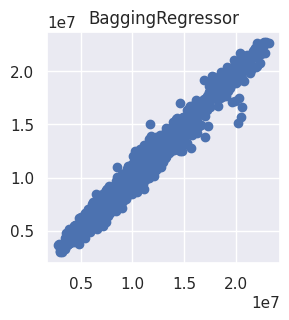

('R2 score is :', 0.9644115227781656, 'root absolute error is:', 550906.6568256967, 'Mean root squared error:', 713597.5586856261)
    
_ _ _ _ _
    
GradientBoostingRegressor
GradientBoostingRegressor Traning score is : 0.9737
GradientBoostingRegressor Testing score is : 0.9635


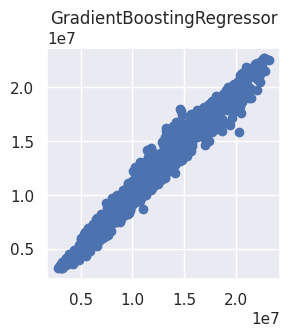

('R2 score is :', 0.9635214638330033, 'root absolute error is:', 550102.6414532852, 'Mean root squared error:', 722465.9008917559)
    
_ _ _ _ _
    
KNeighborsRegressor
KNeighborsRegressor Traning score is : 0.8737
KNeighborsRegressor Testing score is : 0.8082


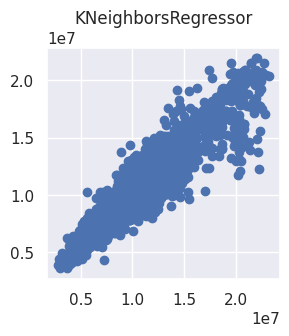

('R2 score is :', 0.8082284338406693, 'root absolute error is:', 1221535.5455833727, 'Mean root squared error:', 1656497.4067396107)
    
_ _ _ _ _
    
SVR
SVR Traning score is : -0.0243
SVR Testing score is : -0.0398


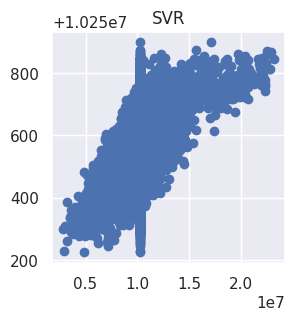

('R2 score is :', -0.03984797539551255, 'root absolute error is:', 2917404.234450848, 'Mean root squared error:', 3857301.4283830924)
    
_ _ _ _ _
    


In [83]:
models=[LinearRegression(),RidgeCV(),LassoCV(),RandomForestRegressor(),AdaBoostRegressor(),DecisionTreeRegressor(),BaggingRegressor(),GradientBoostingRegressor(),KNeighborsRegressor(),SVR()]
from sklearn import tree
for model in models:
  model.fit(x_train,y_train)
  print(model.__class__.__name__)
  print(model.__class__.__name__,"Traning score is :","{:.4f}".format(model.score(x_train,y_train)))
  print(model.__class__.__name__,"Testing score is :","{:.4f}".format(model.score(x_test,y_test)))
  pred_train=model.predict(x_train)
  pred_test=model.predict(x_test)
  plt.figure(figsize=(3,3))
  plt.plot(pred_test,pred_test,'bo')
  plt.scatter(y_test,pred_test)
  plt.title(model.__class__.__name__)
  if model==DecisionTreeRegressor():
    tree.plot_tree(model)
  plt.show()

  print(evaluate(y_test,pred_test))
  print("    ")
  print("_ _ _ _ _")
  print("    ")


###find best hyper parameter

In [84]:
de=DecisionTreeRegressor()
de=de.fit(x_train,y_train)
de.get_depth()

24

In [85]:
des = GridSearchCV(DecisionTreeRegressor(), param_grid={'max_depth': list(range(1, 24))}, cv=10)
des.fit(x_train, y_train)
print(des.best_score_)
print(des.best_params_)
print(des.best_estimator_)

0.9404963142885394
{'max_depth': 10}
DecisionTreeRegressor(max_depth=10)


In [86]:
'''svmreg = GridSearchCV(SVR(), param_grid={'C':[1,10000,10000000],'kernel': ['linear', 'poly', 'rbf'] })
svmreg.fit(x_train, y_train)
print(svmreg.best_score_)
print(svmreg.best_params_)
print(svmreg.best_estimator_)
0.9742618853914594
{'C': 10000000, 'kernel': 'rbf'}
SVR(C=10000000)'''

"svmreg = GridSearchCV(SVR(), param_grid={'C':[1,10000,10000000],'kernel': ['linear', 'poly', 'rbf'] })\nsvmreg.fit(x_train, y_train)\nprint(svmreg.best_score_)\nprint(svmreg.best_params_)\nprint(svmreg.best_estimator_)\n0.9742618853914594\n{'C': 10000000, 'kernel': 'rbf'}\nSVR(C=10000000)"

In [87]:
param_grid = dict(n_neighbors=list(range(1,31)))
grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=10)
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]})

In [88]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.819792612250491
{'n_neighbors': 12}
KNeighborsRegressor(n_neighbors=12)


#Model with turned hyper paramer

LinearRegression
LinearRegression Traning score is : 0.8702
LinearRegression Testing score is : 0.8667


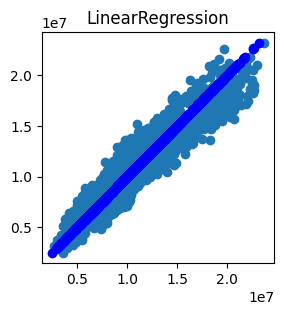

('R2 score is :', 0.8666737062075038, 'root absolute error is:', 1105647.0349984195, 'Mean root squared error:', 1391926.210296042)
    
_ _ _ _ _
    
RandomForestRegressor
RandomForestRegressor Traning score is : 0.9955
RandomForestRegressor Testing score is : 0.9660


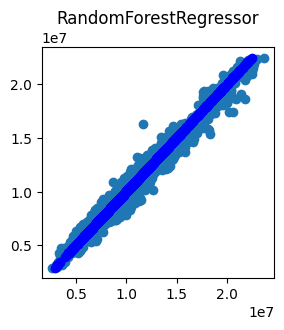

('R2 score is :', 0.9659923444166689, 'root absolute error is:', 551074.719744922, 'Mean root squared error:', 702985.9677904361)
    
_ _ _ _ _
    
AdaBoostRegressor
AdaBoostRegressor Traning score is : 0.8925
AdaBoostRegressor Testing score is : 0.8866


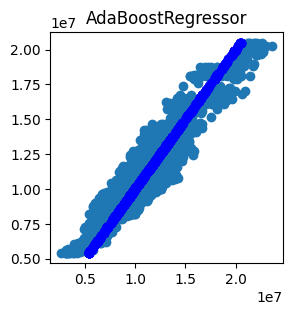

('R2 score is :', 0.8866186825998719, 'root absolute error is:', 1038271.6401174961, 'Mean root squared error:', 1283598.0800508198)
    
_ _ _ _ _
    
DecisionTreeRegressor
DecisionTreeRegressor Traning score is : 0.9819
DecisionTreeRegressor Testing score is : 0.9402


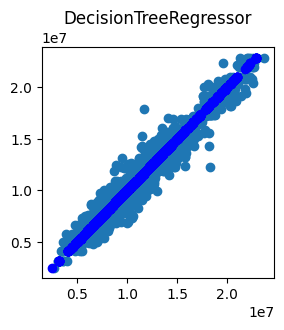

('R2 score is :', 0.9401926061413854, 'root absolute error is:', 704523.828188673, 'Mean root squared error:', 932257.2049757462)
    
_ _ _ _ _
    
BaggingRegressor
BaggingRegressor Traning score is : 0.9936
BaggingRegressor Testing score is : 0.9621


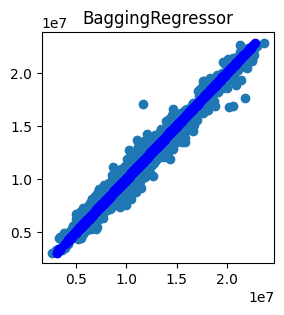

('R2 score is :', 0.9620580357743956, 'root absolute error is:', 582045.9749645725, 'Mean root squared error:', 742537.1973991257)
    
_ _ _ _ _
    
GradientBoostingRegressor
GradientBoostingRegressor Traning score is : 0.9723
GradientBoostingRegressor Testing score is : 0.9646


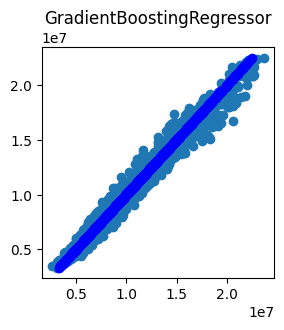

('R2 score is :', 0.964626455047129, 'root absolute error is:', 553296.26007643, 'Mean root squared error:', 716964.4164035534)
    
_ _ _ _ _
    
KNeighborsRegressor
KNeighborsRegressor Traning score is : 0.8554
KNeighborsRegressor Testing score is : 0.8171


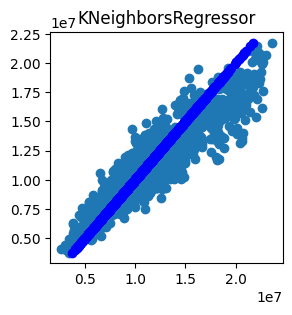

('R2 score is :', 0.8171233713639305, 'root absolute error is:', 1239059.3176665092, 'Mean root squared error:', 1630186.9523494872)
    
_ _ _ _ _
    
SVR
SVR Traning score is : 0.9965
SVR Testing score is : 0.9807


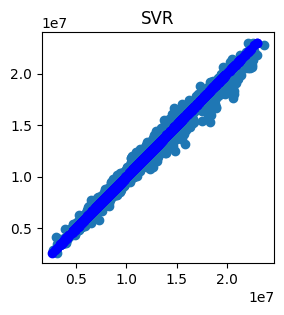

('R2 score is :', 0.9807031341606465, 'root absolute error is:', 380907.3227817576, 'Mean root squared error:', 529543.5689721256)
    
_ _ _ _ _
    


In [37]:
modelsT=[LinearRegression(),RandomForestRegressor(),AdaBoostRegressor(),DecisionTreeRegressor(max_depth=10),BaggingRegressor(),GradientBoostingRegressor(),KNeighborsRegressor(n_neighbors=10),SVR(C= 10000000,kernel= 'rbf')]
from sklearn import tree
for model in modelsT:
  model.fit(x_train,y_train)
  print(model.__class__.__name__)
  print(model.__class__.__name__,"Traning score is :","{:.4f}".format(model.score(x_train,y_train)))
  print(model.__class__.__name__,"Testing score is :","{:.4f}".format(model.score(x_test,y_test)))
  pred_train=model.predict(x_train)
  pred_test=model.predict(x_test)
  plt.figure(figsize=(3,3))
  plt.plot(pred_test,pred_test,'bo')
  plt.scatter(y_test,pred_test)
  plt.title(model.__class__.__name__)
  if model==DecisionTreeRegressor():
    tree.plot_tree(model)
  plt.show()

  print(evaluate(y_test,pred_test))
  print("    ")
  print("_ _ _ _ _")
  print("    ")


#Feature Eliminating






##Check Multicollinearity

In [38]:
li=LinearRegression().fit(x_train,y_train)

print(li.__class__.__name__)

li.coef_

LinearRegression


array([-308925.66140187,  139144.52022094,  -72899.61840975,
         27713.44119139, -984058.3160174 , -431282.56769677,
       1706825.35923834,  -58381.76993222,  204658.40531783,
         79961.7165557 , -578078.93176736,  -41452.39784448,
        -57453.82101762,  515845.83081736,  -98383.85946722,
       -178814.52173426, -150736.67862401,  273209.1364274 ,
       2147583.64011899,  238378.10940132])

In [39]:
x.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS'],
      dtype='object')

<Axes: >

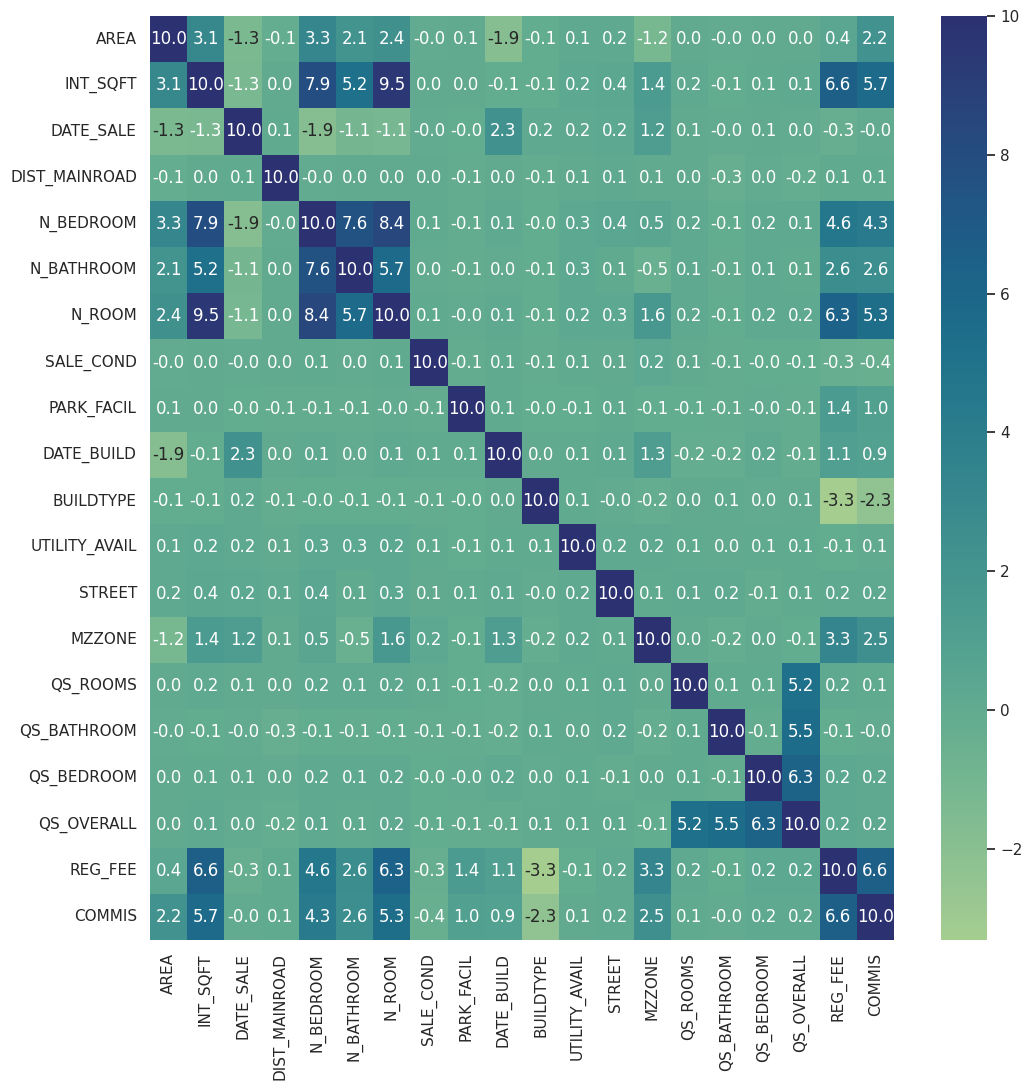

In [40]:
sns.set (rc = {'figure.figsize':(12, 12)})

sns.heatmap(x.corr()*10,cmap="crest",annot=True,fmt=".1f")

int_sqft = ['REG_FEE', 'COMMIS', 'N_BATHROOM', 'N_BEDROOM', 'N_ROOM']


In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

variable=x

vif=pd.DataFrame()

vif['var inf factor']=[variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features']=x.columns

vif


,var inf factor,Features
0,1.080726,AREA
1,1.835644,INT_SQFT
2,0.026468,DATE_SALE
3,0.994062,DIST_MAINROAD
4,1.287149,N_BEDROOM
5,1.047451,N_BATHROOM
6,1.660286,N_ROOM
7,0.988882,SALE_COND
8,1.018958,PARK_FACIL
9,1.035985,DATE_BUILD


vif is less then 2 so its ok ,reg_fee & COMMIS have more score

In [42]:








from statsmodels.regression.linear_model import OLS

import statsmodels.regression.linear_model as smf

reg_reg=smf.OLS(endog=y_train,exog=x_train).fit()

reg_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            SALES_PRICE   R-squared (uncentered):                   0.092
Model:                            OLS   Adj. R-squared (uncentered):              0.088
Method:                 Least Squares   F-statistic:                              24.97
Date:                Thu, 15 Feb 2024   Prob (F-statistic):                    2.41e-88
Time:                        12:42:58   Log-Likelihood:                         -87077.
No. Observations:                4939   AIC:                                  1.742e+05
Df Residuals:                    4919   BIC:                                  1.743e+05
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -3.089e+05   1.84e+05     -1.682      0.093   -6.69e+05    5.11e+04
x2          1.391e+05   5.73e+05      0.243      0.808   -9.85e+05    1.26e+06
x3          -7.29e+04   1.67e+05     -0.437      0.662      -4e+05    2.54e+05
x4          2.771e+04   1.57e+05      0.177      0.860    -2.8e+05    3.35e+05
x5         -9.841e+05   3.92e+05     -2.511      0.012   -1.75e+06   -2.16e+05
x6         -4.313e+05   2.48e+05     -1.736      0.083   -9.18e+05    5.57e+04
x7          1.707e+06   6.18e+05      2.760      0.006    4.94e+05    2.92e+06
x8         -5.838e+04   1.57e+05     -0.371      0.710   -3.66e+05     2.5e+05
x9          2.047e+05   1.61e+05      1.273      0.203    -1.1e+05     5.2e+05
x10         7.996e+04   1.67e+05      0.480      0.631   -2.47e+05    4.07e+05
x11        -5.781e+05   1.78e+05     -3.240      0.001   -9.28e+05   -2.28e+05
x12        -4.145e+04   1.57e+05     -0.264      0.792   -3.49e+05    2.66e+05
x13        -5.745e+04   1.57e+05     -0.365      0.715   -3.66e+05    2.51e+05
x14         5.158e+05   1.74e+05      2.967      0.003    1.75e+05    8.57e+05
x15        -9.838e+04   4.62e+05     -0.213      0.831      -1e+06    8.07e+05
x16        -1.788e+05   5.04e+05     -0.355      0.723   -1.17e+06     8.1e+05
x17        -1.507e+05   5.71e+05     -0.264      0.792   -1.27e+06     9.7e+05
x18         2.732e+05   8.61e+05      0.317      0.751   -1.42e+06    1.96e+06
x19         2.148e+06   2.78e+05      7.736      0.000     1.6e+06    2.69e+06
x20         2.384e+05   2.21e+05      1.079      0.280   -1.95e+05    6.71e+05
==============================================================================
Omnibus:                       18.501   Durbin-Watson:                   0.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.667
Skew:                           0.141   Prob(JB):                     8.84e-05
Kurtosis:                       3.105   Cond. No.                         15.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##Eliminate some Features

In [43]:
#we will see how model is affecting without some features
df1=pd.read_csv('/content/Chennai houseing sale.csv')

df1.head(1)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.33,380000,144400,7600000


In [44]:
df1.dropna(axis=0,inplace=True)

In [45]:
df1.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

REG_FEE is Highly correlated with sales price , we try predict without REG_FEE and some other features also

In [46]:
x1=df1.drop(['PRT_ID','N_BATHROOM','REG_FEE','COMMIS','SALES_PRICE','N_BEDROOM','N_ROOM','DATE_SALE'],axis=1)

y1=df1['SALES_PRICE']

In [47]:
df1.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [48]:
col=x1.select_dtypes(include='object').columns

In [49]:
lae=LabelEncoder()

for j in col:

 x1[j]=lae.fit_transform(x1[j])


In [50]:
x1.select_dtypes(include='object').columns

Index([], dtype='object')

In [51]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3)



scal=StandardScaler()

scal_tr=scal.fit(x1_train)

x1_train=scal_tr.transform(x1_train)

x1_test=scal.transform(x1_test)

LinearRegression
LinearRegression Traning score is : 0.6843
LinearRegression Testing score is : 0.6784


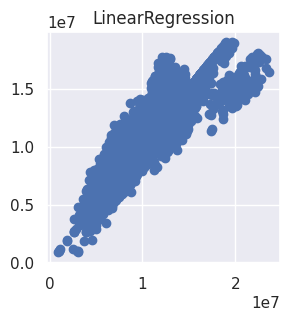

('R2 score is :', 0.6784149622578962, 'root absolute error is:', 1668573.0674828398, 'Mean root squared error:', 2136020.024924155)
 
_ _ _ _ _
 
RandomForestRegressor
RandomForestRegressor Traning score is : 0.9965
RandomForestRegressor Testing score is : 0.9774


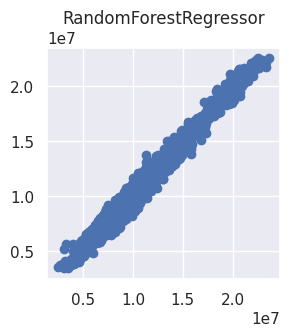

('R2 score is :', 0.9773947102790321, 'root absolute error is:', 446578.4655408597, 'Mean root squared error:', 566320.7069437503)
 
_ _ _ _ _
 
AdaBoostRegressor
AdaBoostRegressor Traning score is : 0.8761
AdaBoostRegressor Testing score is : 0.8764


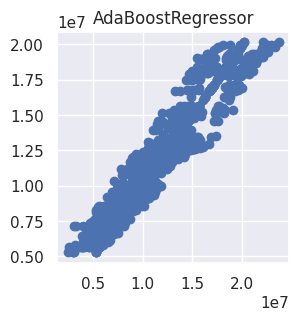

('R2 score is :', 0.8764253141098567, 'root absolute error is:', 1073456.1529079783, 'Mean root squared error:', 1324104.1913490966)
 
_ _ _ _ _
 
DecisionTreeRegressor
DecisionTreeRegressor Traning score is : 0.9862
DecisionTreeRegressor Testing score is : 0.9566


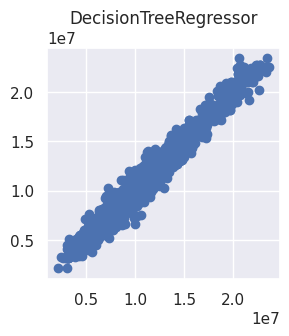

('R2 score is :', 0.9566104343135188, 'root absolute error is:', 616292.2082984048, 'Mean root squared error:', 784603.1622941027)
 
_ _ _ _ _
 
BaggingRegressor
BaggingRegressor Traning score is : 0.9947
BaggingRegressor Testing score is : 0.9741


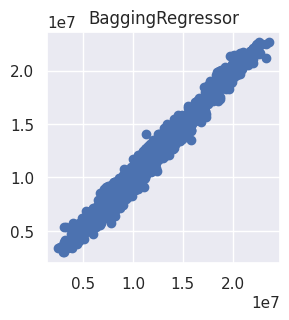

('R2 score is :', 0.9740781621167485, 'root absolute error is:', 477510.64690599905, 'Mean root squared error:', 606443.4332926844)
 
_ _ _ _ _
 
GradientBoostingRegressor
GradientBoostingRegressor Traning score is : 0.9844
GradientBoostingRegressor Testing score is : 0.9839


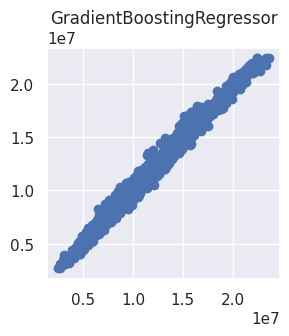

('R2 score is :', 0.9839171066978241, 'root absolute error is:', 368569.915026428, 'Mean root squared error:', 477682.6781269813)
 
_ _ _ _ _
 
KNeighborsRegressor
KNeighborsRegressor Traning score is : 0.6966
KNeighborsRegressor Testing score is : 0.6175


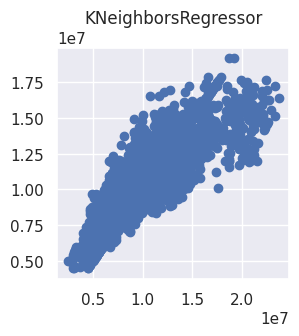

('R2 score is :', 0.6174545187279374, 'root absolute error is:', 1769780.1166745394, 'Mean root squared error:', 2329694.3200659384)
 
_ _ _ _ _
 
SVR
SVR Traning score is : 0.9410
SVR Testing score is : 0.8960


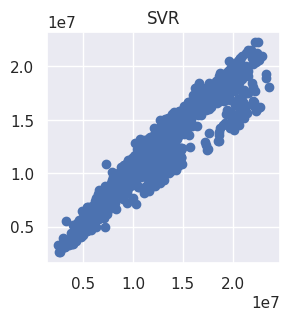

('R2 score is :', 0.8959876646265603, 'root absolute error is:', 740541.6116580621, 'Mean root squared error:', 1214786.1351641095)
 
_ _ _ _ _
 


In [52]:


models1=[LinearRegression(),RandomForestRegressor(),AdaBoostRegressor(),DecisionTreeRegressor(max_depth=10),BaggingRegressor(),GradientBoostingRegressor(),KNeighborsRegressor(n_neighbors=10),SVR(C= 10000000,kernel= 'rbf')]



for model1 in models1:

 model1.fit(x1_train,y1_train)

 print(model1.__class__.__name__)

 print(model1.__class__.__name__,"Traning score is :","{:.4f}".format(model1.score(x1_train,y1_train)))

 print(model1.__class__.__name__,"Testing score is :","{:.4f}".format(model1.score(x1_test,y1_test)))

 pred_train1=model1.predict(x1_train)

 pred_test1=model1.predict(x1_test)

 plt.figure(figsize=(3,3))

 plt.plot(pred_test1,pred_test1,'bo')

 plt.scatter(y1_test,pred_test1)

 plt.title(model1.__class__.__name__)

 plt.show()

 print(evaluate(y1_test,pred_test1))

 print(" ")

 print("_ _ _ _ _")

 print(" ")



#Prediction

In [53]:
model_best=RandomForestRegressor().fit(x1_train,y1_train)

In [54]:
def predict(input):



  x=input.drop(['PRT_ID','N_BATHROOM','REG_FEE','COMMIS','SALES_PRICE','N_BEDROOM','N_ROOM','DATE_SALE'],axis=1)

  col_obj=x.select_dtypes(include='object').columns

  lae=LabelEncoder()

  for j in col_obj:

    x[j]=lae.fit_transform(x[j])

  x=scal_tr.transform(x)

  predicted_value=model_best.predict(x)

  return "Predicted price is:",predicted_value[0],"Actual price is ",input['SALES_PRICE'].values[0]

In [55]:
predict(df1.iloc[55:56])

('Predicted price is:', 14591345.0, 'Actual price is ', 13549250)

In [56]:
predict(df1.iloc[6:7,:])

('Predicted price is:', 12368517.05, 'Actual price is ', 8488790)